In [2]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [3]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('heart_v2.csv')

In [4]:
df.columns

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

In [5]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [6]:
# Putting feature variable to X
X = df.drop('heart disease',axis=1)

# Putting response variable to y
y = df['heart disease']

### Train Test Split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

Fitting the decision tree with default hyperparameters, apart from max_depth which is 3 so that we can plot and read the tree.

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [11]:
!pip install six

In [13]:
!pip install pydotplus


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24576 sha256=0dbe2ddb2beeb0d36a62873329e2c1857907c6c0f3e7bf651224882d8960de45
  Stored in directory: c:\users\prakh\appdata\local\pip\cache\wheels\bd\ce\e8\ff9d9c699514922f57caa22fbd55b0a32761114b4c4acc9e03
Successfully built pydotplus


In [14]:
!pip install graphviz


In [15]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

GraphViz is not installed or not in the system PATH.
Please install GraphViz and add it to your system PATH to visualize the decision tree.
You can download GraphViz from: https://graphviz.org/download/
After installation, you may need to restart your Jupyter notebook or Python environment.


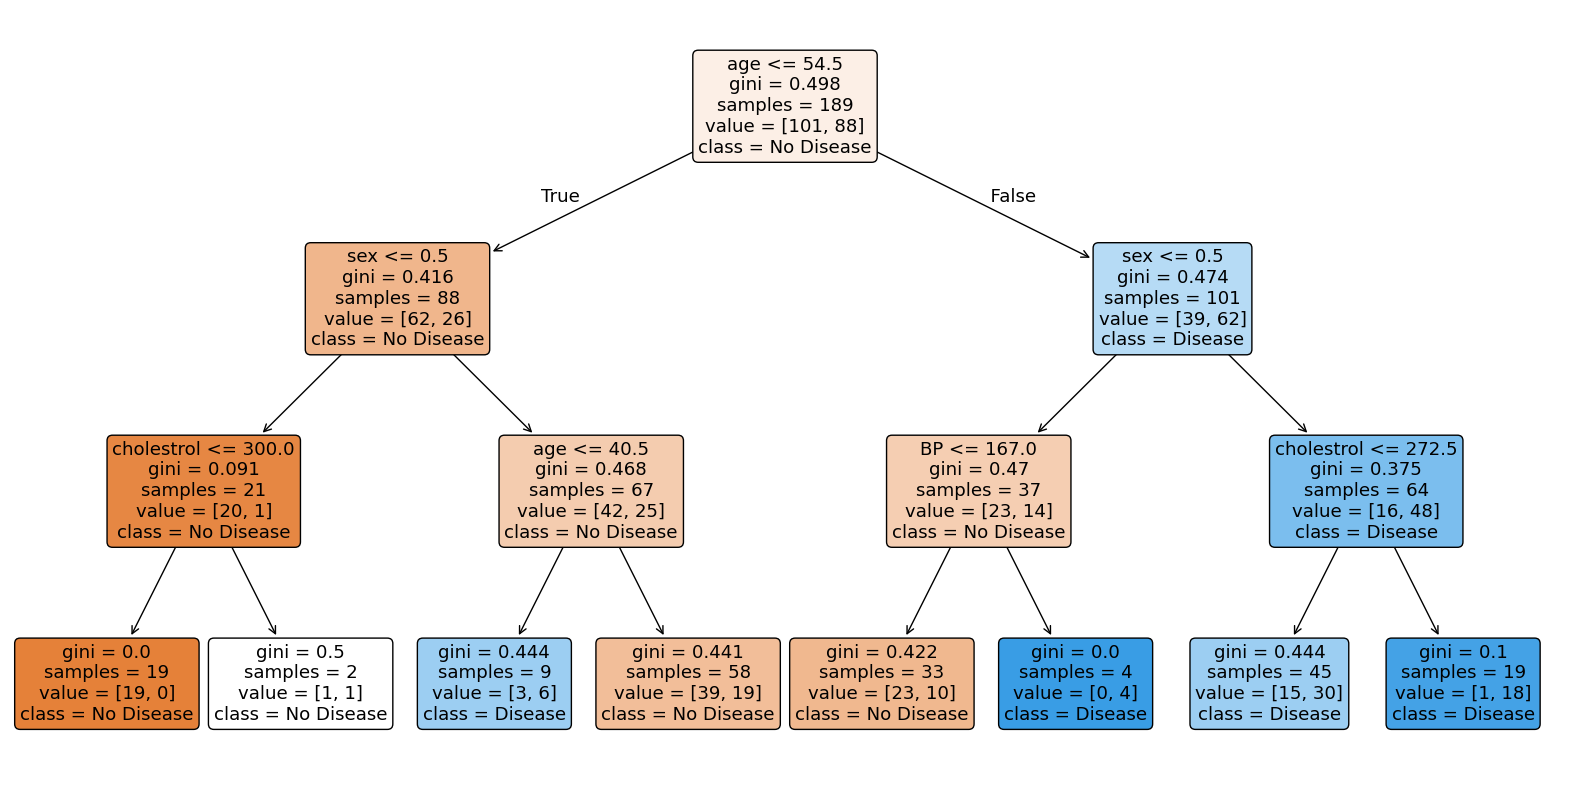

In [18]:
# plotting tree with max_depth=3
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No Disease', "Disease"])

# Check if GraphViz is installed and in the system PATH
import shutil

if shutil.which('dot') is not None:
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    Image(graph.create_png())
else:
    print("GraphViz is not installed or not in the system PATH.")
    print("Please install GraphViz and add it to your system PATH to visualize the decision tree.")
    print("You can download GraphViz from: https://graphviz.org/download/")
    print("After installation, you may need to restart your Jupyter notebook or Python environment.")

# Alternative visualization using sklearn's plot_tree function
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, rounded=True, feature_names=X.columns, class_names=['No Disease', 'Disease'])
plt.show()
#Image(graph.create_png(),width=800,height=900)
#graph.write_pdf("dt_heartdisease.pdf")

#### Evaluating model performance

In [19]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [24]:

print("Train Set Performance:")
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

Train Set Performance:
0.7407407407407407


array([[82, 19],
       [30, 58]], dtype=int64)

In [23]:
print("Test Set Performance:")
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

Test Set Performance:
0.6049382716049383


array([[35, 14],
       [18, 14]], dtype=int64)